**Importation du Dataset**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [95]:
!unzip -F drive/My\ Drive/Dataset/HAPTDataSet.zip

Archive:  drive/My Drive/Dataset/HAPTDataSet.zip
replace features_info.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from collections import OrderedDict
from flask import Flask, jsonify, request


In [0]:
Xtr = pd.DataFrame(np.genfromtxt("Train/X_train.txt"),columns=colonnes)

In [0]:
Ytr = pd.DataFrame(np.genfromtxt("Train/y_train.txt"),columns=["classe"])

In [0]:
Xte = pd.DataFrame(np.genfromtxt("Test/X_test.txt"),columns=colonnes)

In [0]:
Yte = pd.DataFrame(np.genfromtxt("Test/y_test.txt"),columns=["classe"])

In [0]:
mapping = {1.0:"Walking",2.0:"Walking Upstairs", 3.0:"Walking Downstairs", 4.0:"Sitting", 5.0:"Standing", 6.0:"Laying", 7.0:"Stand to Sit", 8.0:"Sit to Stand", 9.0:"Sit to Lie", 10.0:"Lie to Sit", 11.0:"Stand to Lie", 12.0:"Lie to Stand"}
Ytr['fullresults'] = Ytr['classe'].map(mapping)

In [0]:
colonnes = []
with open("features.txt", "r") as f:
    for line in f.readlines():
        colonnes.append(line)
        print(line.strip())

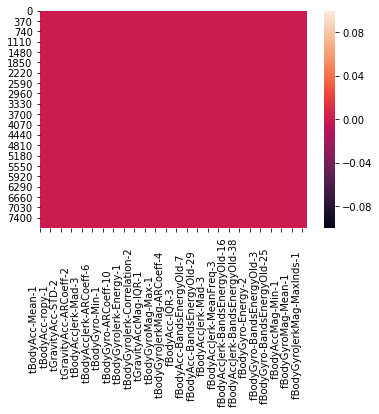

In [21]:
%matplotlib inline
sns.heatmap(Xtr.isna())

Nous regardons s'il y a des zéros dans notre Dataset

In [76]:
%matplotlib inline
base = pd.concat([Xtr,Ytr], axis=1)
baseTest = pd.concat([Xte,Yte], axis=1)
base.dtypes

tBodyAcc-Mean-1                \n    float64
tBodyAcc-Mean-2                \n    float64
tBodyAcc-Mean-3                \n    float64
tBodyAcc-STD-1                 \n    float64
tBodyAcc-STD-2                 \n    float64
                                      ...   
tXAxisAcc-AngleWRTGravity-1    \n    float64
tYAxisAcc-AngleWRTGravity-1    \n    float64
tZAxisAcc-AngleWRTGravity-1    \n    float64
classe                               float64
fullresults                           object
Length: 563, dtype: object

Text(0.5, 0.98, "Obervation entre l'accélaration moyenne horizontale et les mouvements du patient")

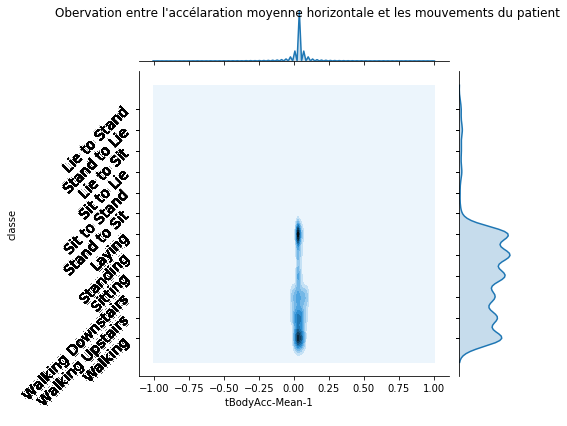

In [120]:
%matplotlib inline
g = sns.jointplot(base["tBodyAcc-Mean-1                \n"], base["classe"], kind="kde")
g.ax_joint.set_yticks(Ytr["classe"])
g.ax_joint.set_yticklabels(Ytr['fullresults'], rotation = 45, horizontalalignment='right', fontweight='light', fontsize='x-large')
g.fig.suptitle("Obervation entre l'accélaration moyenne horizontale et les mouvements du patient")

Text(0.5, 0.98, "Obervation entre l'accélaration moyenne verticale et les mouvements du patient")

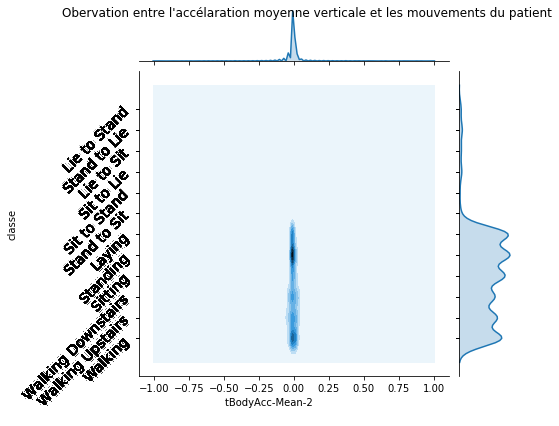

In [78]:
%matplotlib inline
g = sns.jointplot(base["tBodyAcc-Mean-2                \n"], base["classe"], kind="kde")
g.ax_joint.set_yticks(Ytr["classe"])
g.ax_joint.set_yticklabels(Ytr['fullresults'], rotation = 45, horizontalalignment='right', fontweight='light', fontsize='x-large')
g.fig.suptitle("Obervation entre l'accélaration moyenne verticale et les mouvements du patient")

Text(0.5, 0.98, "Obervation entre l'accélaration moyenne sur l'axe z et les mouvements du patient")

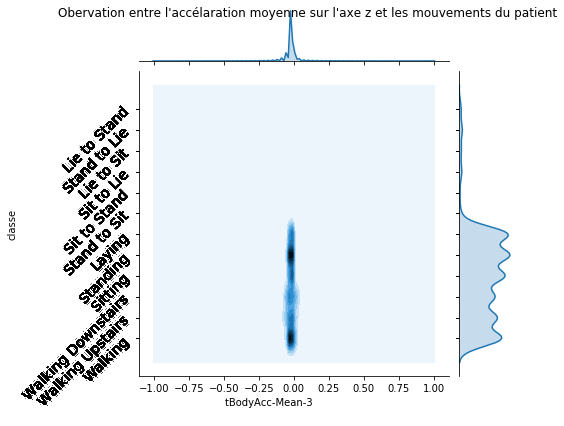

In [79]:
%matplotlib inline
g = sns.jointplot(base["tBodyAcc-Mean-3                \n"], base["classe"], kind="kde")
g.ax_joint.set_yticks(Ytr["classe"])
g.ax_joint.set_yticklabels(Ytr['fullresults'], rotation = 45, horizontalalignment='right', fontweight='light', fontsize='x-large')
g.fig.suptitle("Obervation entre l'accélaration moyenne sur l'axe z et les mouvements du patient")

Text(0.5, 0.98, "Types de mouvements selon l'inclinaison moyenne")

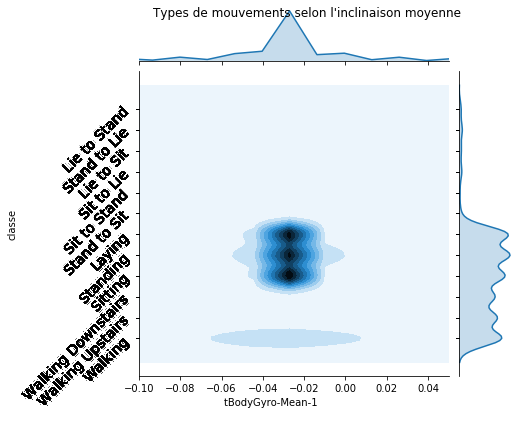

In [119]:
%matplotlib inline
g = sns.jointplot(base["tBodyGyro-Mean-1               \n"], base["classe"], kind="kde")
g.ax_joint.set_yticks(Ytr["classe"])
g.ax_joint.set_yticklabels(Ytr['fullresults'], rotation = 45, horizontalalignment='right', fontweight='light', fontsize='x-large')
g.ax_marg_x.set_xlim(-0.10,0.05)
g.fig.suptitle("Observation de la position de l'individu selon l'inclinaison moyenne")

**Modélisation**

Nous allons ici comparer plusieurs modèle pour voir lequel est le plus performant

In [0]:
performance = {}
ytr = np.ravel(Ytr)
yte = np.ravel(Yte)

Régression avec un arbre de décision

In [109]:
Ytr = pd.DataFrame(np.genfromtxt("Train/y_train.txt"),columns=["classe"])
arbre = DecisionTreeRegressor()
modele     = arbre.fit(Xtr, ytr)
score      = modele.score(Xte, yte)
performance[arbre] = score
score

0.9006621266629892

En utilisant un arbre de décision, on arrive à un score de 0.91. On observe qu'il est proche de 1. C'est une bonne base de modélisation


Utilisons cette fois ci un RandomForest


In [0]:
hyperparametres = {"n_estimators" : 35}
forest = RandomForestRegressor(**hyperparametres)
modeleForest = forest.fit(Xtr,ytr)
score = modeleForest.score(Xte,yte)
performance[forest] = score

hyperparametres = {"n_estimators" : 35, 
                  "max_features"  :  3,
                  "max_depth"     :  50,}
forest2 = RandomForestRegressor(**hyperparametres)
modeleForest2 = forest2.fit(Xtr,ytr)
score = modeleForest2.score(Xte,yte)
performance[forest2] = score

In [0]:
ExtraTrees = ExtraTreesRegressor()
modeleExtraTrees = ExtraTrees.fit(Xtr,ytr)
score = modeleExtraTrees.score(Xte,yte)
performance[ExtraTrees] = score

On voit ici le résultat pour déterminer le meilleur modèle

In [114]:
résultat = OrderedDict(performance)

résultat_tableau = pd.DataFrame()
résultat_tableau["performance"] = résultat.values()
résultat_tableau["algo"] = résutat.keys()
résultat_tableau["algo_name"] = résultat_tableau.algo.map(lambda algo: str(algo).split("(")[0])

résultat_tableau

,performance,algo,algo_name
0,0.900662,"DecisionTreeRegressor(ccp_alpha=0.0, criterion...",DecisionTreeRegressor
1,0.947583,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",RandomForestRegressor
2,0.902218,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",RandomForestRegressor
3,0.949917,"(ExtraTreeRegressor(ccp_alpha=0.0, criterion='...",ExtraTreesRegressor


On remarque que le modèle ExtraTrees est le plus performant

**API Django**

In [123]:
app = Flask(__name__)

@app.route("/activities", methods=['GET'])
def get_activities():
    activites = [a for a in activity_labels.activity_labels]
    return jsonify({'activities':activites})


if __name__ == '__main__':
	app.run(debug=False, threaded=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
